In [1]:
import os
import sys

os.chdir('../')
sys.path.append("Marigold")

In [2]:
import torch
from marigold.repaint_pipeline import (
	MariogldRepaintPipeline,
	MarigoldRepaintScheduler,
)
from marigold import MarigoldPipeline

In [3]:
pipe = MariogldRepaintPipeline.from_pretrained("Bingxin/Marigold", torch_dtype=torch.float32)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
from torchvision import transforms

denoise_steps=10
ensemble_size=10
processing_res=768
match_input_res=True
batch_size=0
color_map="Spectral"

data_path = "/data2/wlsgur4011/SparseDC/datas/cache/1.marigold(vanilla)_a8b9d00ddfebe9d72ec8a22fdb190230.pt"
data = torch.load(data_path)
my_image_tensor = data['rgb'][0].cuda()
image = transforms.ToPILImage()(my_image_tensor)
depth_gt_sparse = data["dep"][0][0].cuda()

pipe_out = pipe(
    image,
    denoising_steps=denoise_steps,
    ensemble_size=ensemble_size,
    processing_res=processing_res,
    match_input_res=match_input_res,
    batch_size=batch_size,
    color_map=color_map,
    show_progress_bar=True,
    depth_gt_sparse=depth_gt_sparse,
    jump_n_sample=2.
)

  Inference batches:   0%|          | 0/1 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
pipe_out['depth_colored']

NameError: name 'pipe_out' is not defined

In [ ]:
%matplotlib inline

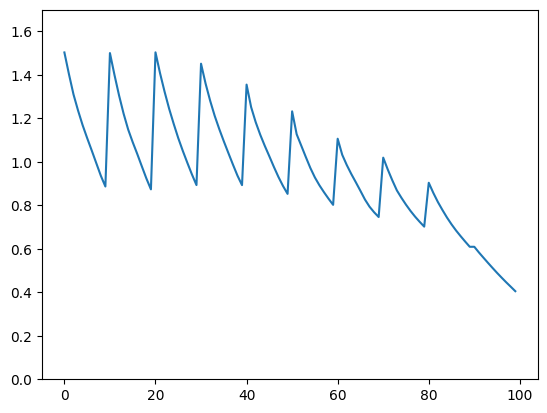

In [ ]:
import matplotlib.pyplot as plt

loss_log = pipe.repaint_scheduler.loss_log
plt.plot(range(len(loss_log)), loss_log)
plt.ylim(0, 1.7)
plt.show()

In [12]:
import jhutil; jhutil.jhprint(1111, pipe_out)

1111  {
    "depth_np": "array[228, 304] f32 n=69312 (0.3Mb) x∈[0.005, 0.996] μ=0.243 σ=0.264",
    "depth_colored": "<PIL.Image.Image image mode=RGB size=304x228 at 0x7FADD4B19F10>",
    "uncertainty": null
}


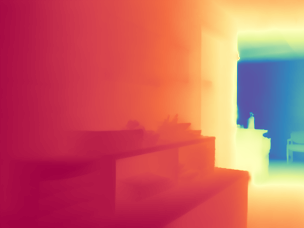

In [13]:
pipe_out["depth_colored"]

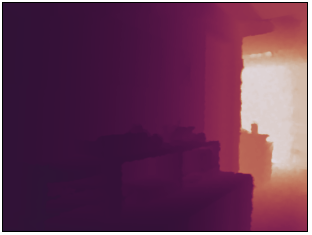

In [14]:
((data['gt'][0][0] - 1) / 6.2).chans

1111  "tensor[576, 768] n=442368 (1.7Mb) x∈[0., 1.000] μ=0.000 σ=0.010"


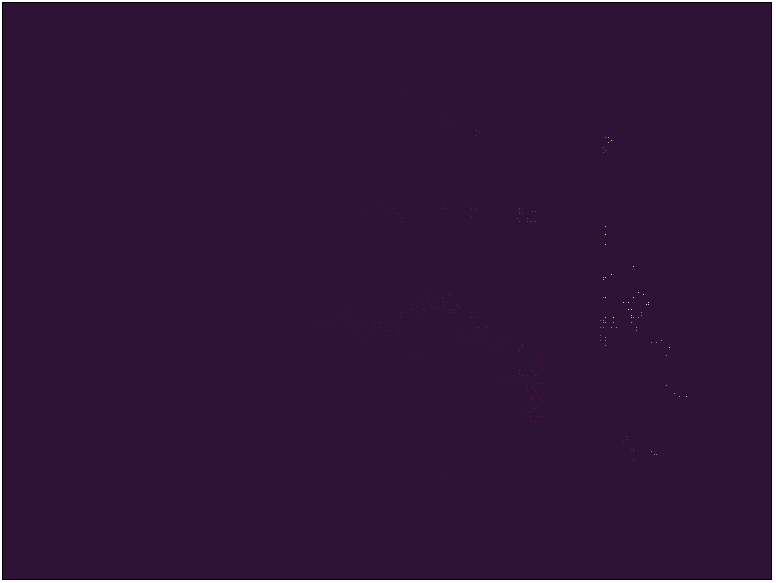

In [ ]:
sparse_depth = pipe_out
import jhutil; jhutil.jhprint(1111, sparse_depth)
sparse_depth.chans

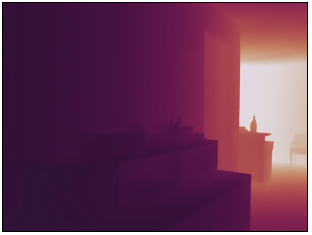

In [14]:
data['depth_pred'].chans